# Exploratory Data Analysis (EDA)

### Imports and data loading

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load transactions
df = pd.read_csv("../data/transactions.csv", parse_dates=["timestamp"])

df.head()


,transaction_id,customer_id,timestamp,amount,merchant_category,channel,country,home_country,hour,night,weekend,country_change,device_risk,velocity,is_fraud
0,0,113,2025-02-08 01:25:00,24.275634,travel,ecommerce,IT,IT,1,1,1,0,2.341156,4,0
1,1,3124,2025-04-21 10:26:00,39.933503,grocery,card_present,ES,ES,10,0,0,0,0.235004,2,0
2,2,352,2025-04-19 00:36:00,27.768396,grocery,ecommerce,NL,NL,0,1,1,0,2.185963,2,0
3,3,2206,2025-02-03 19:01:00,8.453801,restaurants,ecommerce,BE,BE,19,0,0,0,-1.285948,3,0
4,4,3322,2025-04-10 12:33:00,50.878828,grocery,card_present,GB,GB,12,0,0,0,0.097842,3,0


We load the transaction dataset and immediately parse timestamps to allow temporal analysis later.

### Dataset size and Fraud rate

In [16]:
n_tx = len(df)
fraud_rate = df["is_fraud"].mean()

print(f"Number of transactions: {n_tx:,}")
print(f"Fraud rate: {fraud_rate:.3%}")


Number of transactions: 120,000
Fraud rate: 1.472%


**Observation:** Fraud accounts for ~1–2% of transactions, indicating a highly imbalanced classification problem.

The target is highly imbalanced, so accuracy would be misleading. Metrics like PR-AUC or recall at fixed precision will be more appropriate.

### Amount distribution

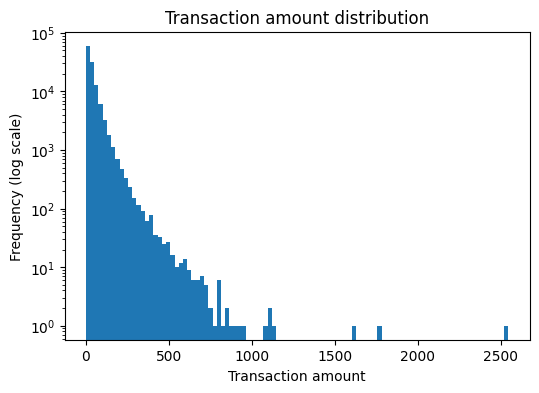

In [17]:
plt.figure(figsize=(6, 4))
plt.hist(df["amount"], bins=100)
plt.yscale("log")
plt.xlabel("Transaction amount")
plt.ylabel("Frequency (log scale)")
plt.title("Transaction amount distribution")
plt.show()


**Observation:** Transaction amounts follow a heavy-tailed distribution, with many small values and few large outliers.

Payment amounts are heavy-tailed, which is common in financial data. Log-scale visualization helps reveal structure.

### Fraud Vs. Non-fraud

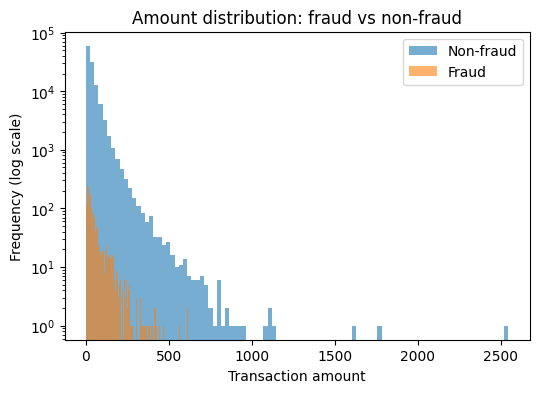

<Figure size 600x400 with 0 Axes>

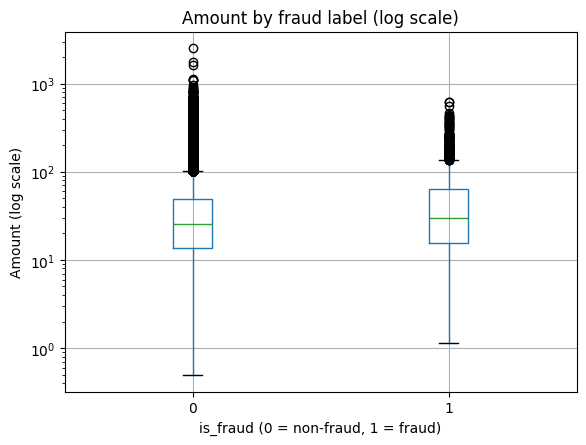

In [18]:
plt.figure(figsize=(6, 4))
plt.hist(df.loc[df["is_fraud"] == 0, "amount"], bins=100, alpha=0.6, label="Non-fraud")
plt.hist(df.loc[df["is_fraud"] == 1, "amount"], bins=100, alpha=0.6, label="Fraud")
plt.yscale("log")
plt.xlabel("Transaction amount")
plt.ylabel("Frequency (log scale)")
plt.legend()
plt.title("Amount distribution: fraud vs non-fraud")
plt.show()

plt.figure(figsize=(6, 4))
df.boxplot(column="amount", by="is_fraud")
plt.yscale("log")
plt.xlabel("is_fraud (0 = non-fraud, 1 = fraud)")
plt.ylabel("Amount (log scale)")
plt.title("Amount by fraud label (log scale)")
plt.suptitle("")
plt.show()


**Observation:** Fraudulent transactions show a higher median amount and a right-shifted interquartile range compared to legitimate transactions.

This suggests transaction amount is a meaningful risk indicator.


### Country Change fraud

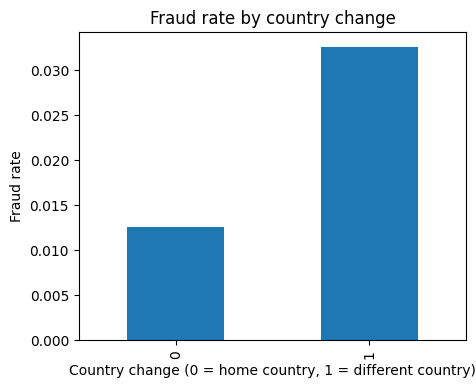

In [19]:
country_fraud_rate = df.groupby("country_change")["is_fraud"].mean()

country_fraud_rate

country_fraud_rate.plot(kind="bar", figsize=(5, 4))
plt.xlabel("Country change (0 = home country, 1 = different country)")
plt.ylabel("Fraud rate")
plt.title("Fraud rate by country change")
plt.show()


**Observation:** Cross-border transactions exhibit a significantly higher fraud rate.


### Channel (Ecommerce Vs. card_present)

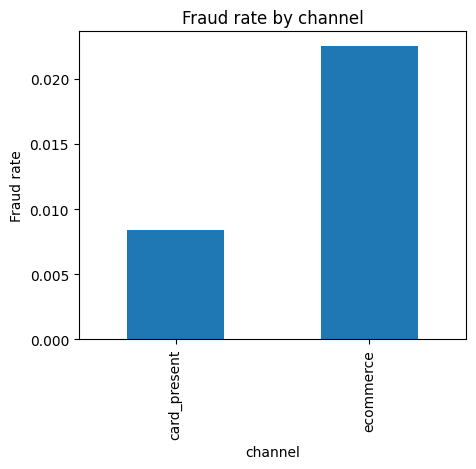

In [20]:
channel_fraud_rate = df.groupby("channel")["is_fraud"].mean()
channel_fraud_rate

channel_fraud_rate.plot(kind="bar", figsize=(5, 4))
plt.ylabel("Fraud rate")
plt.title("Fraud rate by channel")
plt.show()


**Observation:** Ecommerce transactions are around 3 times riskier than card-present transactions.


### Night transactions

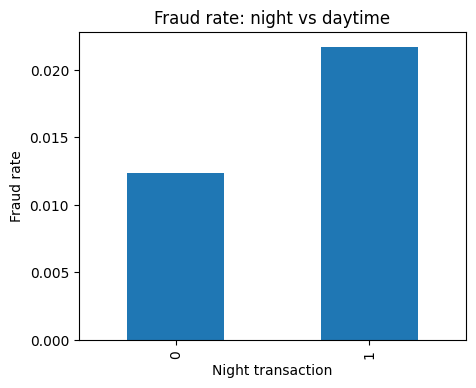

In [21]:
night_fraud_rate = df.groupby("night")["is_fraud"].mean()
night_fraud_rate


night_fraud_rate.plot(kind="bar", figsize=(5, 4))
plt.xlabel("Night transaction")
plt.ylabel("Fraud rate")
plt.title("Fraud rate: night vs daytime")
plt.show()


**Observation:** Night-time transactions show a significative higher fraud risk than day-time ones.


## EDA Summary

Fraud rate is ~1.5%, confirming a strongly imbalanced classification problem.

Fraud is more frequent for:

    - High transaction amounts

    - Ecommerce channel

    - Cross-border transactions

    - Night-time activity

These patterns suggest that combining transaction context, customer behavior, and temporal features should provide predictive power for fraud detection models.